In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\DATA SCIENCE\Kaggle Projects\Financial sentiment analysis\data.csv')
df.head()

,Unnamed: 0,Sentence,Sentiment
0,0,The GeoSolutions technology will leverage Bene...,positive
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,2,"For the last quarter of 2010 , Componenta 's n...",positive
3,3,According to the Finnish-Russian Chamber of Co...,neutral
4,4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [6]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


### SENTIMENT

In [7]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

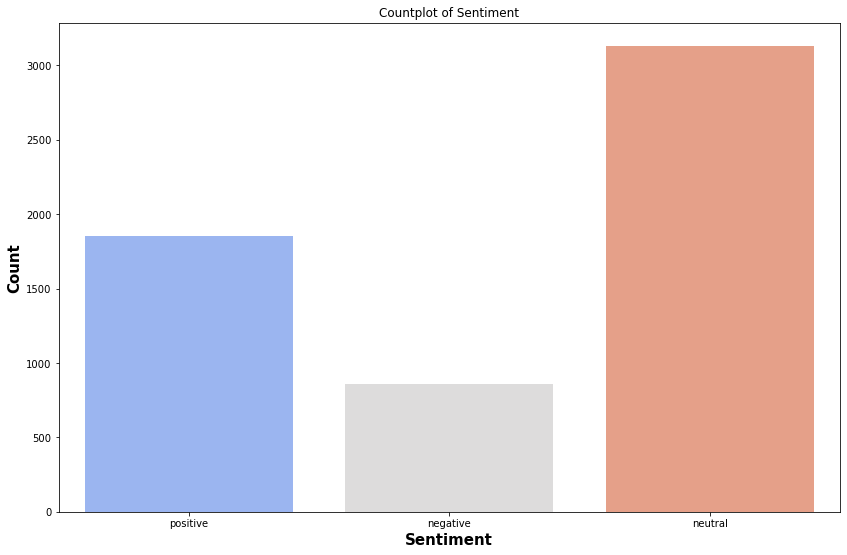

In [9]:
plt.figure(figsize=(14,9))
sns.countplot(x = 'Sentiment',data=df,palette ='coolwarm')
plt.xlabel("Sentiment",fontweight='bold',size=15)
plt.ylabel("Count",fontweight='bold',size=15)
plt.title('Countplot of Sentiment')
plt.show()

### APPLYING LABEL ENCODING TO SENTIMENT COLUMN

In [12]:
def label_encoding(c1):
    label_encoder = preprocessing.LabelEncoder()
    df[c1] = label_encoder.fit_transform(df[c1])
    df[c1].unique()
label_encoding('Sentiment')

In [13]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1


In [15]:
df['Sentiment'].value_counts()

1    3130
2    1852
0     860
Name: Sentiment, dtype: int64

### CLEANING THE SENTENCE

In [20]:
nltk.download('stopwords')

corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Sentence'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus[0:5]

['geosolut technolog leverag benefon gp solut provid locat base search technolog commun platform locat relev multimedia content new power commerci model',
 'esi low bk real possibl',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'accord finnish russian chamber commerc major construct compani finland oper russia',
 'swedish buyout firm sold remain percent stake almost eighteen month take compani public finland']

### WORDCLOUD

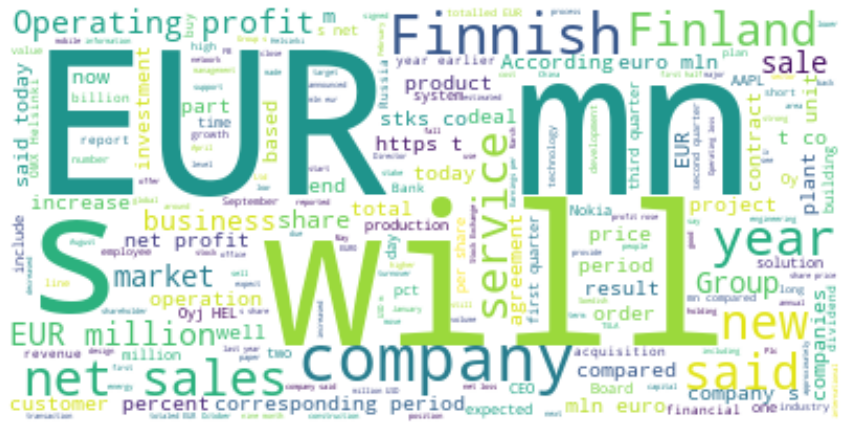

In [25]:
text = " ".join(i for i in df.Sentence)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### CREATING THE BAG OF WORDS MODEL

In [26]:
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

### SPLITTING DATASET INTO TRAINING SET AND TEST SET

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### NAIVE BAYES MODEL

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
classifier = GaussianNB()

In [32]:
classifier.fit(X_train,y_train)

GaussianNB()

In [33]:
y_predict = classifier.predict(X_test)

### CONFUSION MATRIX

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[142  25  25]
 [289 211 143]
 [169  27 138]]


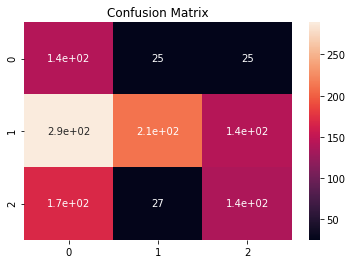

In [38]:
sns.heatmap(cm,annot =True)
plt.title('Confusion Matrix')
plt.show()

In [39]:
acc = accuracy_score(y_test,y_predict)

In [44]:
print(f"Accuracy of Naive Bayes (Using Bag of words technique): ",round(acc,2))

Accuracy of Naive Bayes (Using Bag of words technique):  0.42


### SVM MODEL

In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [46]:
y_pred1 = classifier.predict(X_test)

In [47]:
acc1 = accuracy_score(y_test,y_pred1)

In [48]:
print(f"Accuracy of SVM Model: ",round(acc1,2))

Accuracy of SVM Model:  0.67


### XGBoost Classifier

In [49]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[23:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
y_pred2 = classifier.predict(X_test)

In [62]:
acc3 = accuracy_score(y_test,y_pred2)
print(f"Accuracy of XGBoost Model: ",round(acc3,2))

Accuracy of XGBoost Model:  0.68


### LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logreg = LogisticRegression()

In [55]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred = logreg.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 41 115  36]
 [ 79 503  61]
 [ 18  85 231]]


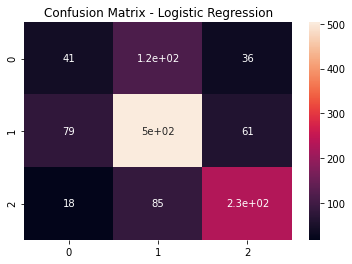

In [58]:
sns.heatmap(cm,annot =True)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [59]:
acc4 = accuracy_score(y_test,y_pred)

In [63]:
print(f"Accuracy of Logistic regression Model: ",round(acc4,2))

Accuracy of Logistic regression Model:  0.66
